In [11]:
from imbalance.pipeline import Pipeline
from imbalance.viz import metric_balance
import numpy as np

fitting classifiers: 100%|█| 1176/1176 [00:21<00:00, 54.73it/s, size=1, balance=0.99, classifier=SVC, metric=balanced_


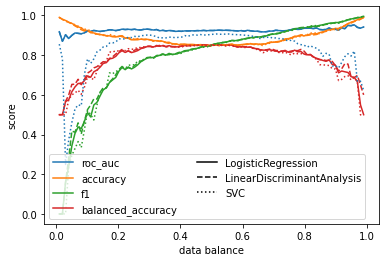

In [12]:
# generate random data
n = 1000
x = np.concatenate(
    [np.random.normal(0, size=n // 2), np.random.normal(2, size=n // 2)]
).reshape(-1, 1)
y = np.concatenate([np.zeros(n // 2), np.ones(n // 2)]).astype(int)
groups = np.concatenate([np.arange(n // 2), np.arange(n // 2)]).astype(int)

# run the pipeline
pl = Pipeline(
    x,
    y,
    groups,
    dataset_balance=np.linspace(0, 1, 100)[1:-1],
    classifiers=["lr", "lda", "svm"],
    metrics=["roc_auc", "accuracy", "f1", "balanced_accuracy"],
)
pl.evaluate()

# visualize the results
metric_balance(pl)